#### Boston 데이터셋 활용 집값 예측 모델
- dataset : boston.csv
- framework : Pytorch

- [1] 모듈 로딩 및 데이터 준비

In [187]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optimizer

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [188]:
torch.manual_seed(1)

In [189]:
DATA_FILE = '../../Data/boston.csv'

houseDF = pd.read_csv(DATA_FILE)
houseDF.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [190]:
houseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [191]:
houseDF.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

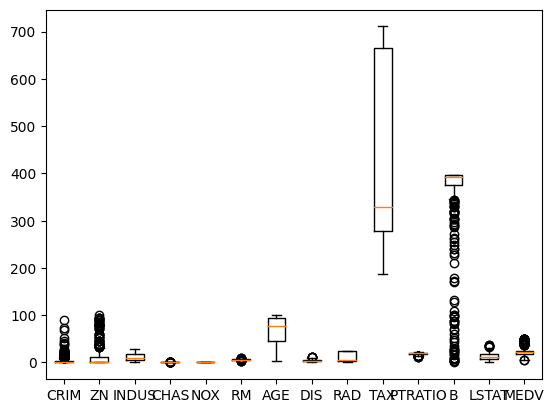

In [192]:
plt.boxplot(houseDF)
plt.xticks(range(1, len(houseDF.columns) + 1), houseDF.columns)
plt.show()

In [193]:
houseDF.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [194]:
col_name = []

for i in range(len(houseDF.columns)):
    if (abs(houseDF.corr()["MEDV"][i]) >= 0.5):
        col_name.append(houseDF.columns[i])

col_name

['RM', 'PTRATIO', 'LSTAT', 'MEDV']

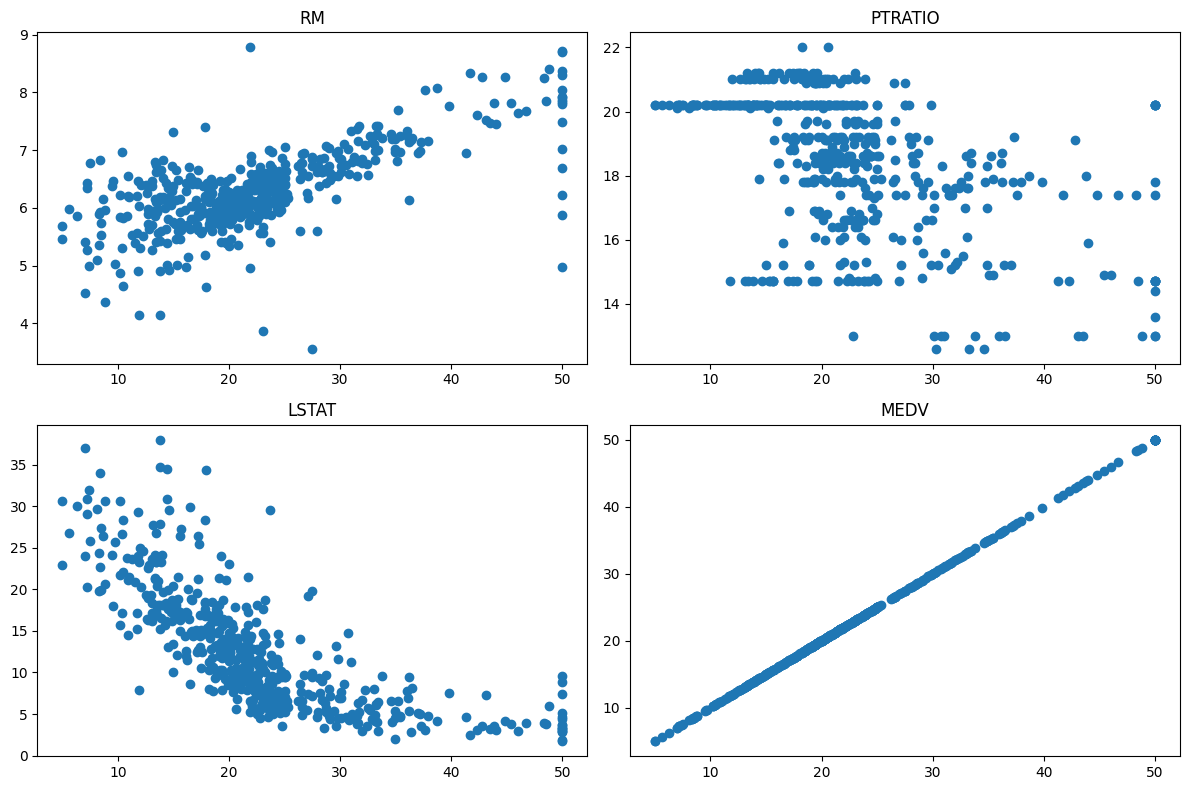

In [195]:
fig = plt.figure(figsize = (12, 8))
axes = fig.subplots(2, 2)

for i in range(2):
    for j in range(2):
        axes[i][j].scatter(houseDF[col_name[-1]], houseDF[col_name[i * 2 + j]])
        axes[i][j].set_title(col_name[i * 2 + j])
plt.tight_layout()
plt.show()

In [196]:
col_name = ["RM", "LSTAT", "MEDV"]
houseDF[col_name]

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0


[2] 모델 준비
- 학습방법 : 지도 학습 => 회귀
- 알고리즘 : 선형 관계 => 선형 모델 => nn.Linear

In [197]:
model = nn.Linear(1, 1)

In [198]:
for name, param in model.named_parameters():
    print(f"[{name}] {param}\n")

[weight] Parameter containing:
tensor([[0.5153]], requires_grad=True)

[bias] Parameter containing:
tensor([-0.4414], requires_grad=True)



[3] 최적화 인스턴스 준비

In [199]:
adam_optim = optimizer.Adam(model.parameters(), lr = 0.5)

[4] 학습 ==> 개발자가 구현

- [4-1] 데이터셋 Tensor화 진행 : 데이터 준비 시 진행 하거나 또는 학습 전 진행

In [200]:
featureTS = torch.from_numpy(houseDF[col_name[:-2]].values).float()
featureTS, featureTS.shape

(tensor([[6.5750],
         [6.4210],
         [7.1850],
         [6.9980],
         [7.1470],
         [6.4300],
         [6.0120],
         [6.1720],
         [5.6310],
         [6.0040],
         [6.3770],
         [6.0090],
         [5.8890],
         [5.9490],
         [6.0960],
         [5.8340],
         [5.9350],
         [5.9900],
         [5.4560],
         [5.7270],
         [5.5700],
         [5.9650],
         [6.1420],
         [5.8130],
         [5.9240],
         [5.5990],
         [5.8130],
         [6.0470],
         [6.4950],
         [6.6740],
         [5.7130],
         [6.0720],
         [5.9500],
         [5.7010],
         [6.0960],
         [5.9330],
         [5.8410],
         [5.8500],
         [5.9660],
         [6.5950],
         [7.0240],
         [6.7700],
         [6.1690],
         [6.2110],
         [6.0690],
         [5.6820],
         [5.7860],
         [6.0300],
         [5.3990],
         [5.6020],
         [5.9630],
         [6.1150],
         [6.

In [201]:
targetTS = torch.from_numpy(houseDF[col_name[-1]].values).float()
targetTS, targetTS.shape

(tensor([24.0000, 21.6000, 34.7000, 33.4000, 36.2000, 28.7000, 22.9000, 27.1000,
         16.5000, 18.9000, 15.0000, 18.9000, 21.7000, 20.4000, 18.2000, 19.9000,
         23.1000, 17.5000, 20.2000, 18.2000, 13.6000, 19.6000, 15.2000, 14.5000,
         15.6000, 13.9000, 16.6000, 14.8000, 18.4000, 21.0000, 12.7000, 14.5000,
         13.2000, 13.1000, 13.5000, 18.9000, 20.0000, 21.0000, 24.7000, 30.8000,
         34.9000, 26.6000, 25.3000, 24.7000, 21.2000, 19.3000, 20.0000, 16.6000,
         14.4000, 19.4000, 19.7000, 20.5000, 25.0000, 23.4000, 18.9000, 35.4000,
         24.7000, 31.6000, 23.3000, 19.6000, 18.7000, 16.0000, 22.2000, 25.0000,
         33.0000, 23.5000, 19.4000, 22.0000, 17.4000, 20.9000, 24.2000, 21.7000,
         22.8000, 23.4000, 24.1000, 21.4000, 20.0000, 20.8000, 21.2000, 20.3000,
         28.0000, 23.9000, 24.8000, 22.9000, 23.9000, 26.6000, 22.5000, 22.2000,
         23.6000, 28.7000, 22.6000, 22.0000, 22.9000, 25.0000, 20.6000, 28.4000,
         21.4000, 38.7000, 4

In [202]:
X_train, X_test, y_train, y_test = train_test_split(featureTS,
                                                    targetTS,
                                                    test_size = 0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size = 0.2)

print(f"[FEATURE] TRAIN {X_train.shape}, TEST {X_test.shape}, VAL {X_val.shape}")
print(f"[TARGET]  TRAIN {y_train.shape}, TEST {y_test.shape}, VAL {y_val.shape}")

[FEATURE] TRAIN torch.Size([323, 1]), TEST torch.Size([102, 1]), VAL torch.Size([81, 1])
[TARGET]  TRAIN torch.Size([323]), TEST torch.Size([102]), VAL torch.Size([81])


- [4-2] 학습진행
    * 학습 횟수 결정 ==> 에포크 설정
    * 학습 결과 저장 ==> 손실 저장 변수

In [203]:
EPOCH = 1000

In [204]:
def testing(testTS, targetTS, kind = 'Val'):
    with torch.no_grad():
        pre_y = model(testTS)

        loss = F.mse_loss(pre_y, targetTS)
        print(f"[{kind}] LOSS : {loss}")

    return loss

In [205]:
def training(featureTS, targetTS, valTS, valTargetTS):
    loss_history = [[], []]

    for epoch in range(EPOCH + 1):
        pre_y = model(featureTS)
        loss = F.mse_loss(pre_y, targetTS)
        loss_history[0].append(loss.item())

        adam_optim.zero_grad()
        loss.backward()
        adam_optim.step()

        val_loss = testing(valTS, valTargetTS)
        loss_history[1].append(val_loss.item())

        print(f"[{epoch} / {EPOCH}] LOSS : {loss}")
    
    return loss_history

In [206]:
loss = training(X_train, y_train, X_val, y_val)

[Val] LOSS : 307.9242248535156
[0 / 1000] LOSS : 504.43267822265625
[Val] LOSS : 210.45472717285156
[1 / 1000] LOSS : 370.52191162109375
[Val] LOSS : 141.03697204589844
[2 / 1000] LOSS : 264.3495788574219
[Val] LOSS : 98.49336242675781
[3 / 1000] LOSS : 185.83389282226562
[Val] LOSS : 80.25559997558594
[4 / 1000] LOSS : 133.98606872558594
[Val] LOSS : 82.01337432861328
[5 / 1000] LOSS : 106.51010131835938
[Val] LOSS : 97.71218872070312
[6 / 1000] LOSS : 99.45562744140625
[Val] LOSS : 120.2120361328125
[7 / 1000] LOSS : 107.19017028808594
[Val] LOSS : 142.5994873046875
[8 / 1000] LOSS : 122.99202728271484
[Val] LOSS : 159.5991973876953
[9 / 1000] LOSS : 140.27345275878906
[Val] LOSS : 168.36585998535156
[10 / 1000] LOSS : 153.92327880859375
[Val] LOSS : 168.41249084472656
[11 / 1000] LOSS : 161.08544921875
[Val] LOSS : 160.98037719726562
[12 / 1000] LOSS : 161.12403869628906
[Val] LOSS : 148.2774200439453
[13 / 1000] LOSS : 155.04705810546875
[Val] LOSS : 132.83514404296875
[14 / 1000] 

C:\Users\KDP-2\AppData\Local\Temp\ipykernel_3640\2224304548.py:6: UserWarning: Using a target size (torch.Size([323])) that is different to the input size (torch.Size([323, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(pre_y, targetTS)
C:\Users\KDP-2\AppData\Local\Temp\ipykernel_3640\4046355004.py:5: UserWarning: Using a target size (torch.Size([81])) that is different to the input size (torch.Size([81, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(pre_y, targetTS)


[Val] LOSS : 78.82795715332031
[202 / 1000] LOSS : 96.84893035888672
[Val] LOSS : 78.8151626586914
[203 / 1000] LOSS : 96.83470916748047
[Val] LOSS : 78.80250549316406
[204 / 1000] LOSS : 96.82048797607422
[Val] LOSS : 78.78996276855469
[205 / 1000] LOSS : 96.8062973022461
[Val] LOSS : 78.7774429321289
[206 / 1000] LOSS : 96.7921371459961
[Val] LOSS : 78.764892578125
[207 / 1000] LOSS : 96.77799987792969
[Val] LOSS : 78.75227355957031
[208 / 1000] LOSS : 96.7638931274414
[Val] LOSS : 78.73956298828125
[209 / 1000] LOSS : 96.74980163574219
[Val] LOSS : 78.72674560546875
[210 / 1000] LOSS : 96.73574829101562
[Val] LOSS : 78.71382141113281
[211 / 1000] LOSS : 96.72171783447266
[Val] LOSS : 78.70082092285156
[212 / 1000] LOSS : 96.70770263671875
[Val] LOSS : 78.68778991699219
[213 / 1000] LOSS : 96.6937255859375
[Val] LOSS : 78.6747817993164
[214 / 1000] LOSS : 96.67977905273438
[Val] LOSS : 78.66181945800781
[215 / 1000] LOSS : 96.66585540771484
[Val] LOSS : 78.64894104003906
[216 / 1000]

[Val] LOSS : 78.29346466064453
[245 / 1000] LOSS : 96.26224517822266
[Val] LOSS : 78.28158569335938
[246 / 1000] LOSS : 96.24930572509766
[Val] LOSS : 78.26974487304688
[247 / 1000] LOSS : 96.23638916015625
[Val] LOSS : 78.25794219970703
[248 / 1000] LOSS : 96.22350311279297
[Val] LOSS : 78.2461929321289
[249 / 1000] LOSS : 96.21066284179688
[Val] LOSS : 78.23450469970703
[250 / 1000] LOSS : 96.1978530883789
[Val] LOSS : 78.22283935546875
[251 / 1000] LOSS : 96.18508911132812
[Val] LOSS : 78.21123504638672
[252 / 1000] LOSS : 96.17234802246094
[Val] LOSS : 78.19966125488281
[253 / 1000] LOSS : 96.15963745117188
[Val] LOSS : 78.18812561035156
[254 / 1000] LOSS : 96.14698028564453
[Val] LOSS : 78.1766128540039
[255 / 1000] LOSS : 96.13434600830078
[Val] LOSS : 78.16512298583984
[256 / 1000] LOSS : 96.12174987792969
[Val] LOSS : 78.15364837646484
[257 / 1000] LOSS : 96.10918426513672
[Val] LOSS : 78.14219665527344
[258 / 1000] LOSS : 96.09666442871094
[Val] LOSS : 78.1307601928711
[259 / 

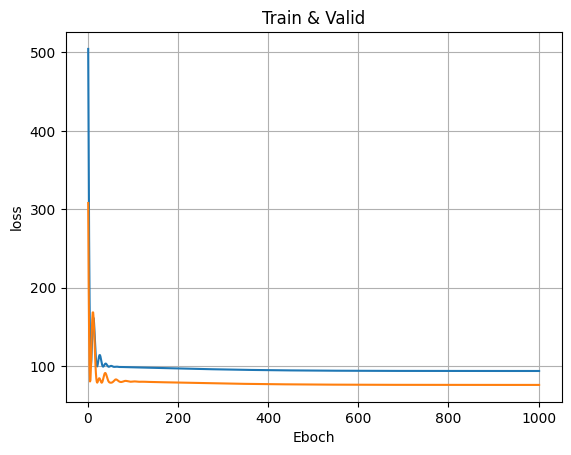

In [207]:
# 학습 후 loss 시각화
import matplotlib.pyplot as plt

plt.plot(range(1, 1002), loss[0], label = 'Train')
plt.plot(range(1, 1002), loss[1], label = 'Val')
plt.title("Train & Valid")
plt.grid()
plt.xlabel('Eboch')
plt.ylabel('loss')
plt.show()